## Import dataset

In [146]:
import pandas as pd

links = pd.read_csv("stack_network_links.csv")
links

source target      value
0               azure   .net  20.933192
1          sql-server   .net  32.322524
2             asp.net   .net  48.407030
3    entity-framework   .net  24.370903
4                 wpf   .net  32.350925
..                ...    ...        ...
485       objective-c  xcode  43.418825
486             swift  xcode  48.620335
487            iphone  xcode  34.712865
488               ios  xcode  46.365091
489              json    xml  42.721668

[490 rows x 3 columns]

## Define subgraph drawing function

In [147]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

def draw_subgraph(G, nodes, graph_type, node_size=2000):
    
    # Get the top 5 nodes with highest degree centrality
    top_5_nodes = nodes[:5]

    # For each of the top 5 nodes, draw a spring layout graph
    for node in top_5_nodes:
        # Create a subgraph for each node and its neighbors
        subgraph = G.subgraph([node] + list(G.neighbors(node)))

        # Generate spring layout positions
        pos = nx.spring_layout(subgraph)

        # Create a figure and axes
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.axis("off")

        analysis_functions = {
            "degree_centrality": nx.degree_centrality,
            "closeness_centrality": nx.closeness_centrality,
            "betweenness_centrality": nx.betweenness_centrality,
            "eigenvector_centrality": nx.eigenvector_centrality,
        }

        # Get the function from the dictionary and call it with the subgraph
        analysis = analysis_functions.get(graph_type, nx.eigenvector_centrality)(
            subgraph
        )

        # For each node in the subgraph, draw the node with a color and size based on its degree centrality
        for sub_node, cent in analysis.items():
            nx.draw_networkx_nodes(
                subgraph,
                pos,
                nodelist=[sub_node],
                node_color=plt.cm.plasma(cent),
                node_size=cent * node_size,
                alpha=0.85,
            )

        # Draw the edges
        nx.draw_networkx_edges(
            subgraph,
            pos,
            edge_color="#696868",
            alpha=0.8,
            width=1.3,
            arrowstyle="-",
            connectionstyle="arc3,rad=0.35",
        )

        # Draw the labels
        nx.draw_networkx_labels(subgraph, pos, ax=ax)  # Draw on the specified axes
        
        # Create a ScalarMappable object for the colorbar
        norm = colors.Normalize(vmin=min(analysis.values()), vmax=max(analysis.values()))
        sm = cm.ScalarMappable(norm=norm, cmap='plasma')
        sm.set_array([])

        # Add the colorbar to the specified axes
        plt.colorbar(sm, ax=ax, shrink=0.5)

        plt.suptitle(f"{node}", fontsize=20, fontweight='bold', horizontalalignment='center')

        plt.tight_layout()
        
        plt.savefig(f"img/{graph_type}/{node}_graph.png")

        plt.show()

## Degree centrality

In [148]:
G = nx.from_pandas_edgelist(
    links, "source", "target", ["value"], create_using=nx.DiGraph()
)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort and print Degree Centrality
degree_centrality_sorted = dict(
    sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
)
print("degree_centrality:", degree_centrality_sorted)

degree_centrality: {'jquery': 0.2807017543859649, 'c#': 0.24561403508771928, 'css': 0.24561403508771928, 'asp.net': 0.22807017543859648, 'angularjs': 0.22807017543859648, 'javascript': 0.21052631578947367, 'mysql': 0.19298245614035087, 'php': 0.17543859649122806, 'html5': 0.17543859649122806, 'linux': 0.17543859649122806, 'sql-server': 0.15789473684210525, 'sass': 0.15789473684210525, 'hibernate': 0.15789473684210525, 'spring': 0.15789473684210525, '.net': 0.14035087719298245, 'entity-framework': 0.14035087719298245, 'wcf': 0.14035087719298245, 'java': 0.14035087719298245, 'reactjs': 0.14035087719298245, 'mongodb': 0.14035087719298245, 'linq': 0.12280701754385964, 'ajax': 0.12280701754385964, 'node.js': 0.12280701754385964, 'asp.net-web-api': 0.12280701754385964, 'python': 0.12280701754385964, 'spring-mvc': 0.12280701754385964, 'wpf': 0.10526315789473684, 'codeigniter': 0.10526315789473684, 'ios': 0.10526315789473684, 'twitter-bootstrap': 0.10526315789473684, 'wordpress': 0.10526315789

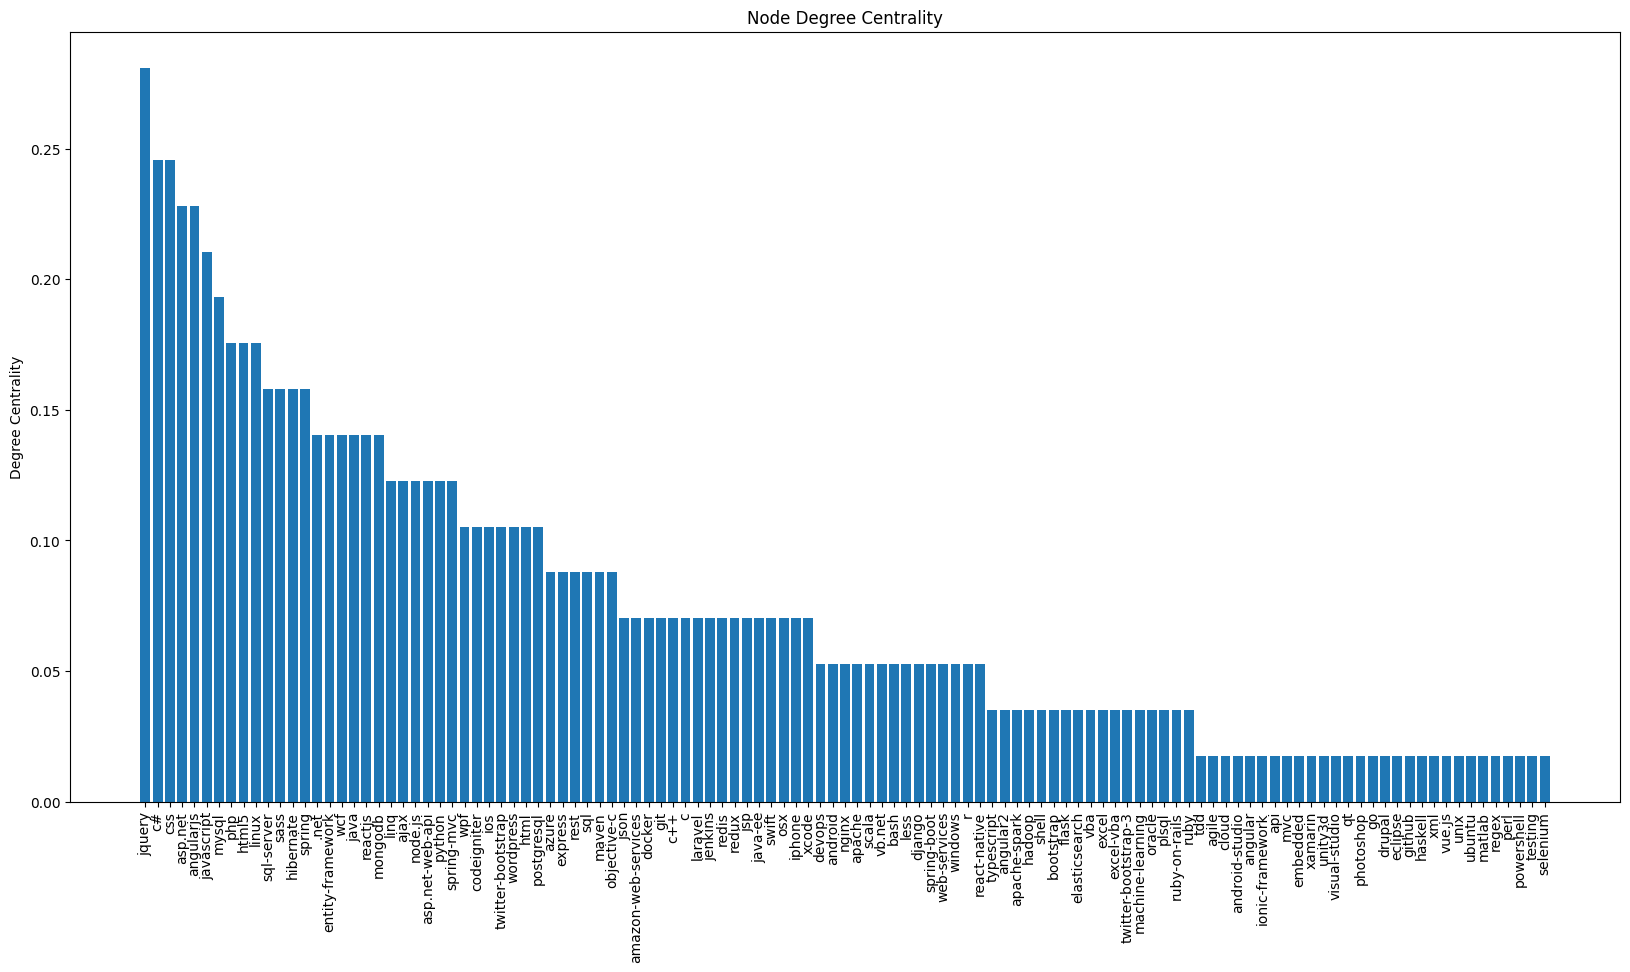

In [149]:
# Sort nodes by degree centrality
degree_sequence = sorted(
    [(n, d) for n, d in degree_centrality.items()], key=lambda x: x[1], reverse=True
)

# Separate the data into two lists
nodes, degrees = zip(*degree_sequence)

# Create a new figure
plt.figure(figsize=(20, 10))

# Create a bar chart
plt.bar(range(len(nodes)), degrees, align="center")

# Add labels with rotation
plt.xticks(range(len(nodes)), nodes, rotation=90)  # Rotate labels by 90 degrees
plt.ylabel("Degree Centrality")
plt.title("Node Degree Centrality")

# Show the plot
plt.show()

c:\Users\akali\dev\NTUST_Course-Social\.venv\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


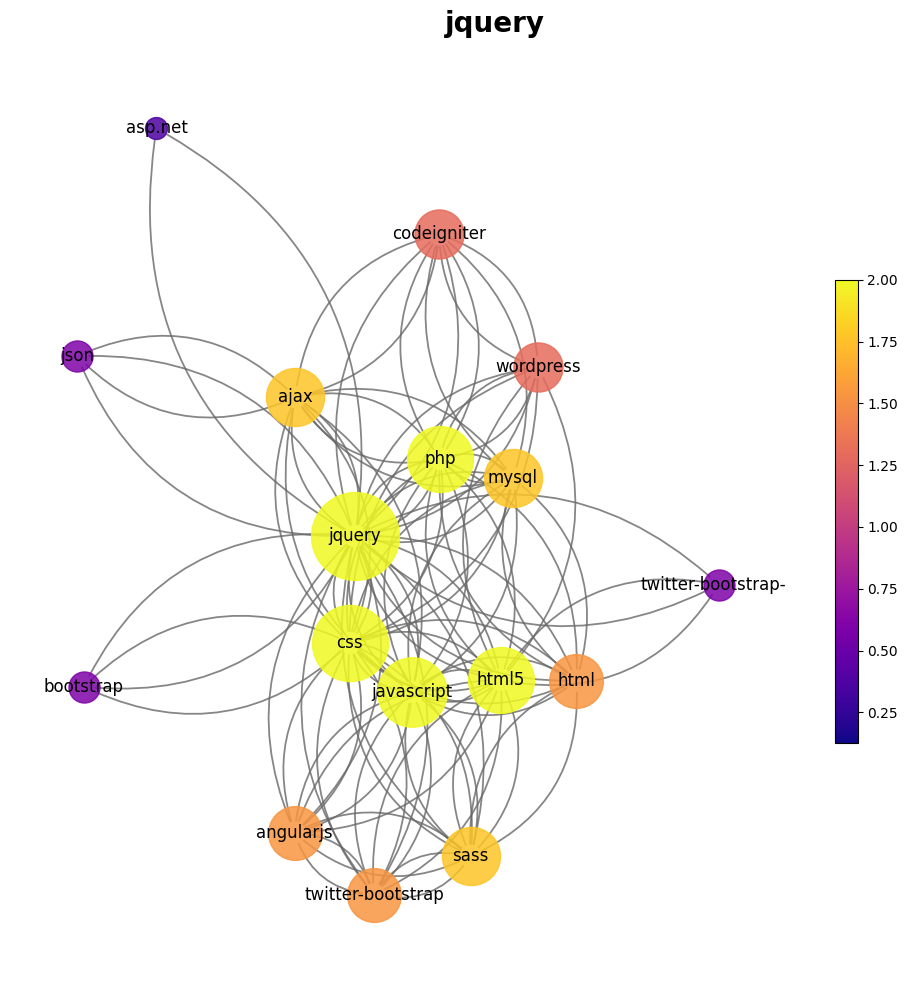

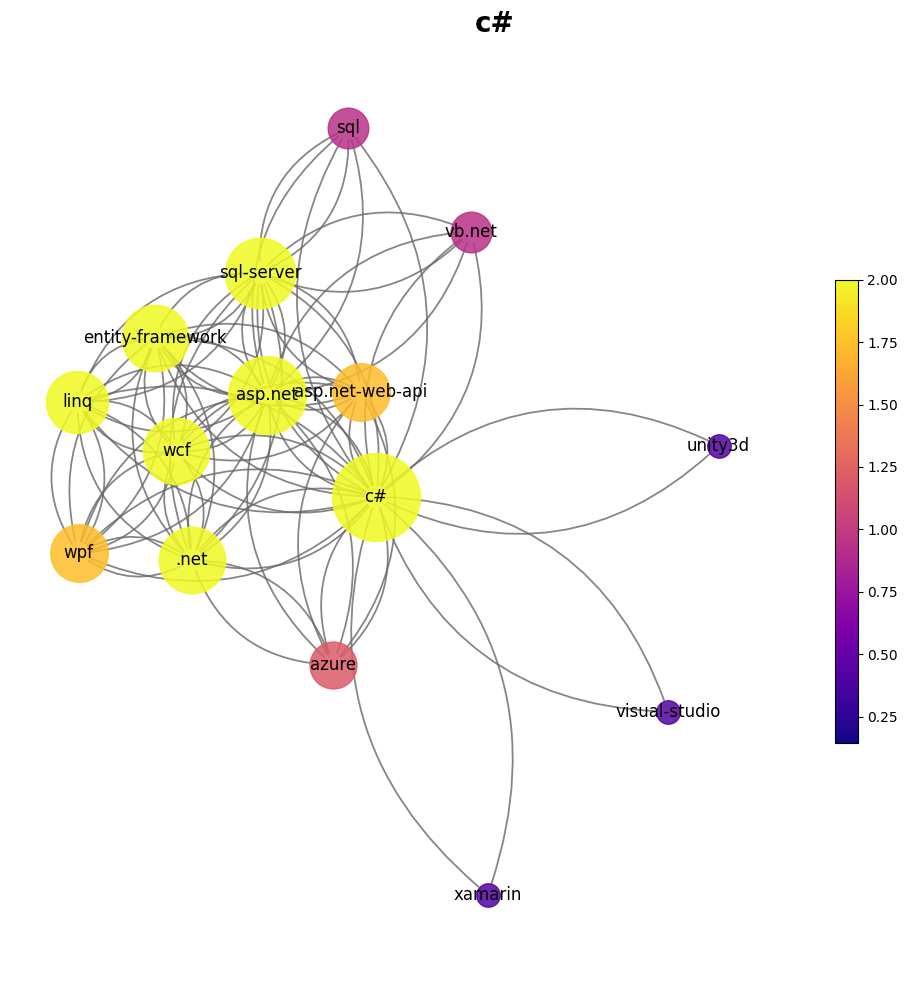

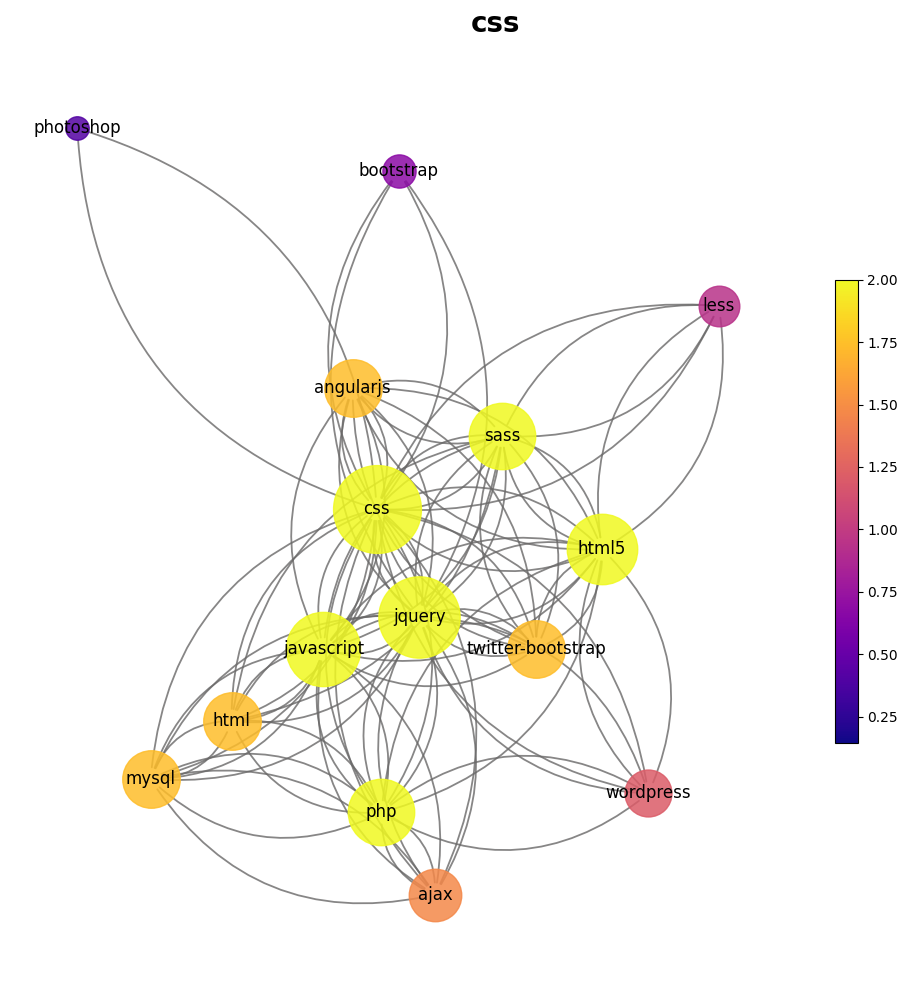

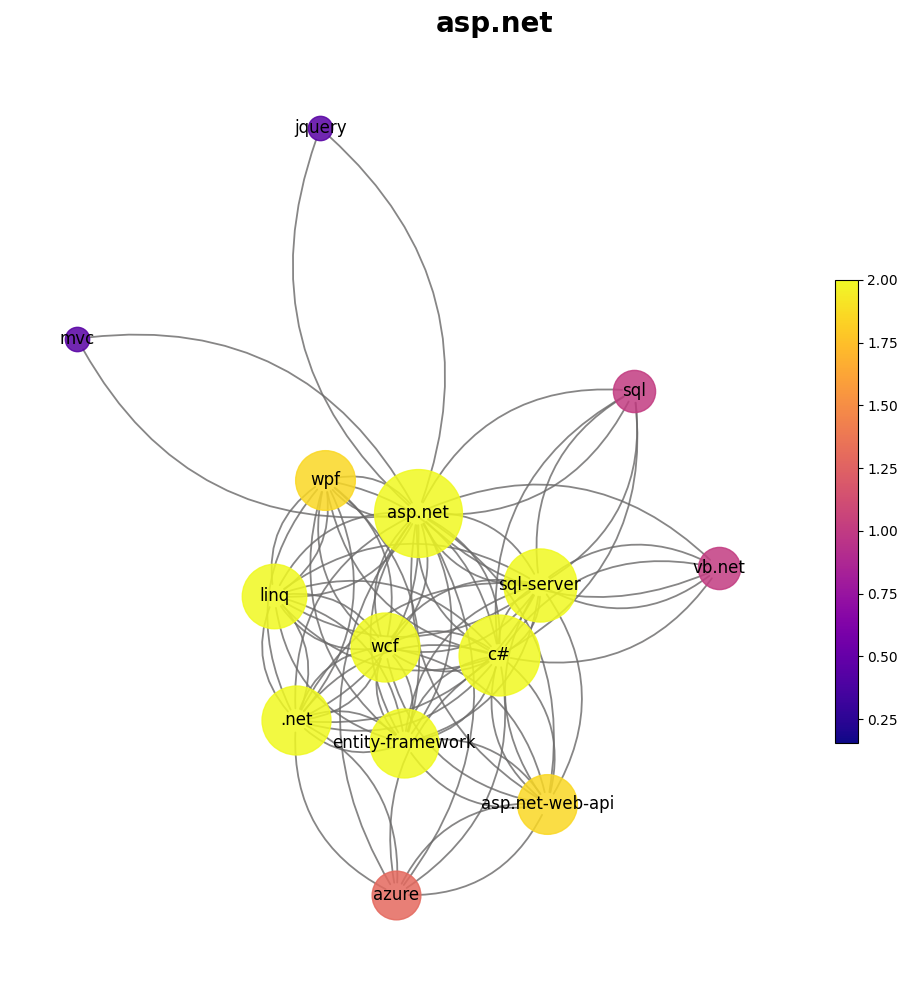

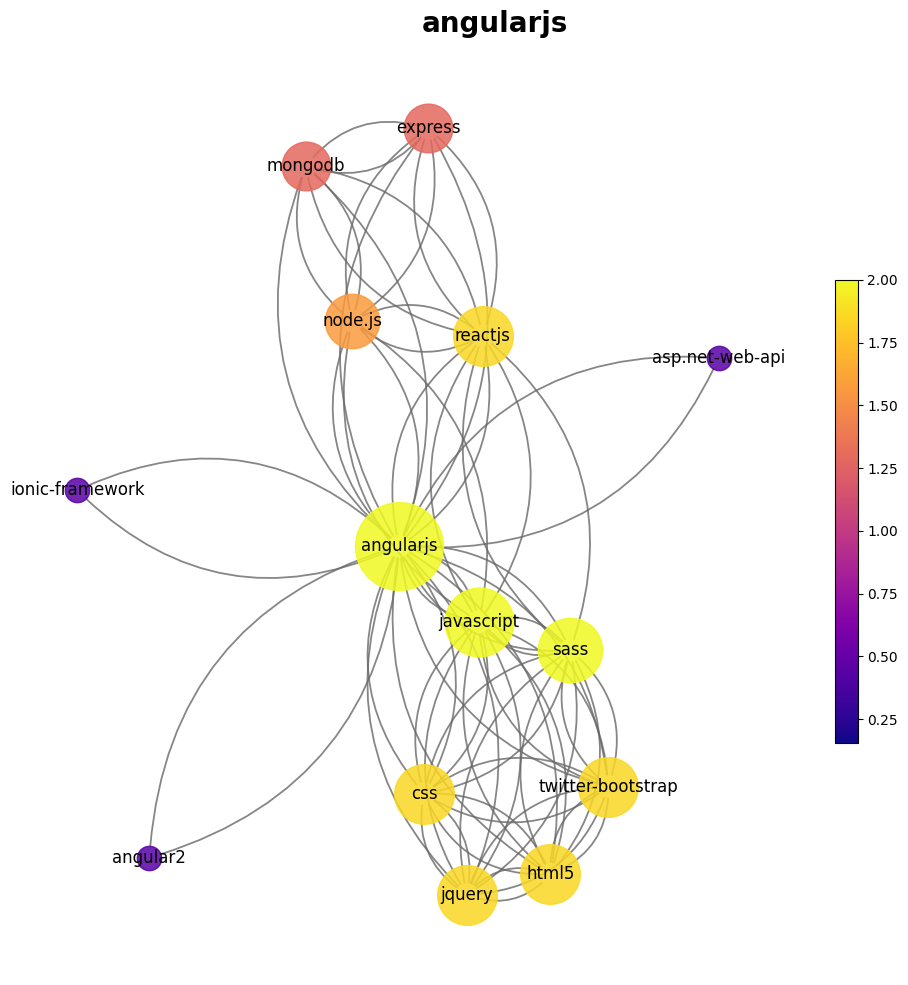

In [150]:
draw_subgraph(G, nodes, "degree_centrality")

## Closeness centrality

closeness_sequence: [('jquery', 0.2895872367001647), ('mysql', 0.2778958265228288), ('ajax', 0.2586198154345401), ('css', 0.25787451337276907), ('javascript', 0.2571334946561807), ('angularjs', 0.2571334946561807), ('apache', 0.2549357724796321), ('php', 0.2513552138773901), ('html', 0.2471891053600853), ('asp.net', 0.24650814363733023), ('json', 0.2458309234625024), ('mongodb', 0.24515741408315306), ('linux', 0.24515741408315306), ('codeigniter', 0.24448758508292587), ('postgresql', 0.23861988304093565), ('html5', 0.23424726738311746), ('sass', 0.23302722953216373), ('twitter-bootstrap', 0.2300320209263519), ('nginx', 0.22944219523166892), ('django', 0.22596579833421937), ('rest', 0.22539661496310046), ('asp.net-web-api', 0.2248302918099268), ('wordpress', 0.22426680736930044), ('reactjs', 0.2237061403508772), ('redis', 0.2231482696766855), ('node.js', 0.22259317447848478), ('bootstrap', 0.2204001382767263), ('express', 0.2198586145954567), ('python', 0.2198586145954567), ('twitter-bo

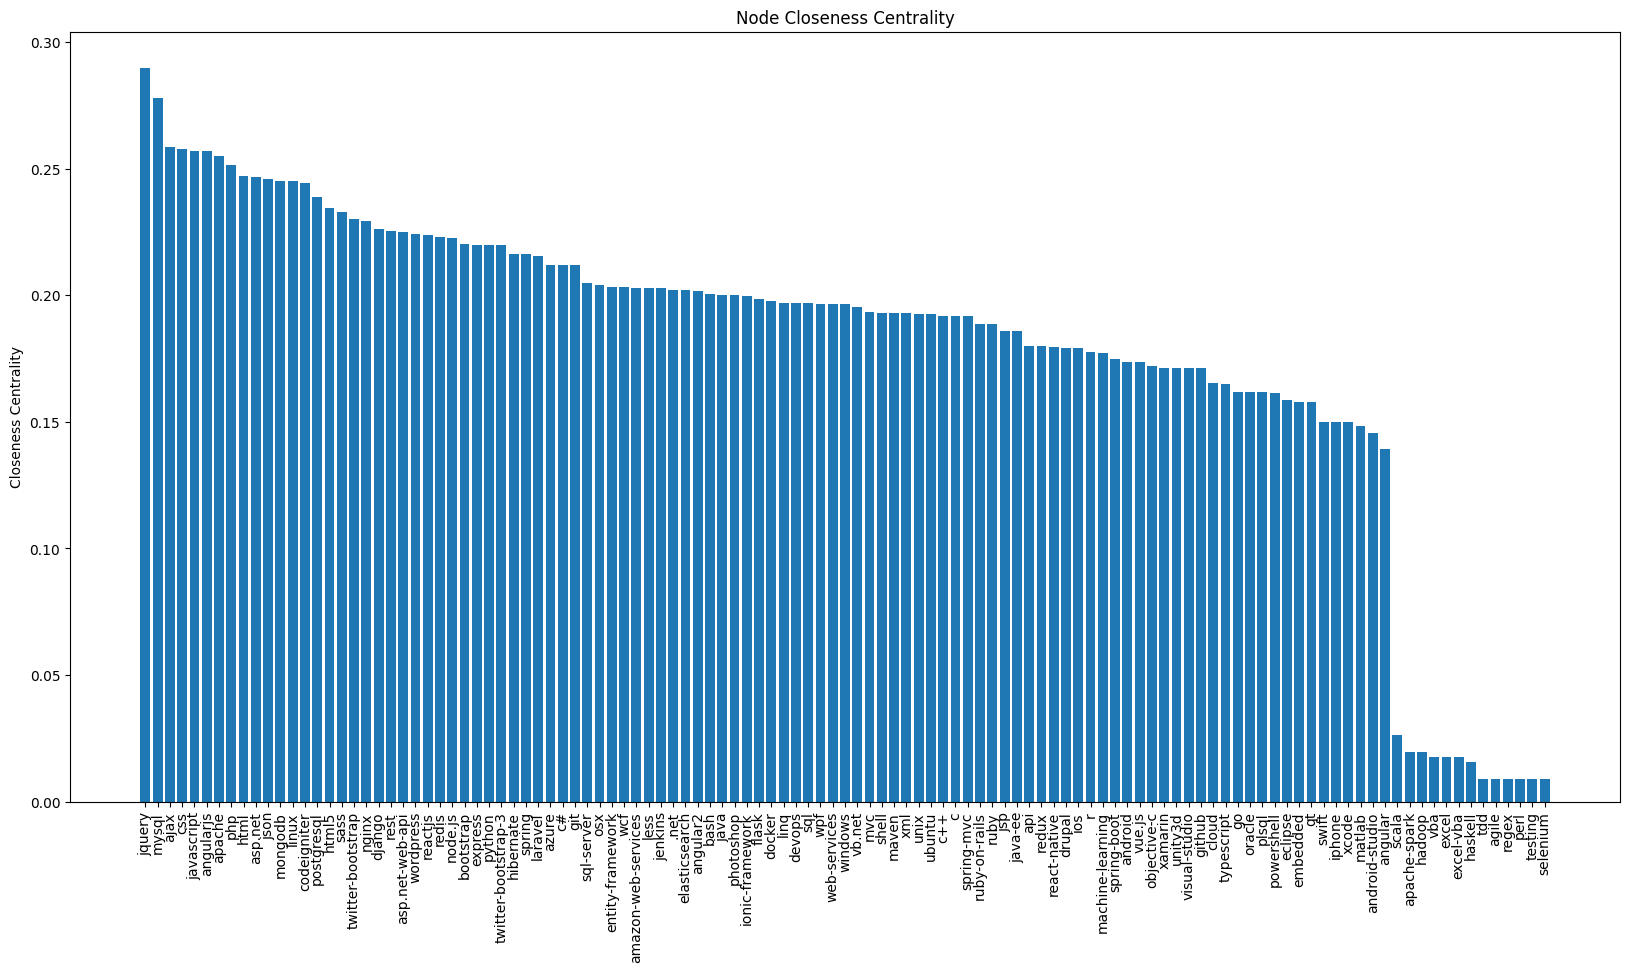

In [151]:
closeness_centrality = nx.closeness_centrality(G)

# 將節點按接近中心性排序
closeness_sequence = sorted(
    [(n, d) for n, d in closeness_centrality.items()], key=lambda x: x[1], reverse=True
)
print("closeness_sequence:", closeness_sequence)

# 將數據分成兩個列表
nodes, closeness_values = zip(*closeness_sequence)

# 創建一個新的圖形
plt.figure(figsize=(20, 10))

# 創建一個條形圖
plt.bar(range(len(nodes)), closeness_values, align="center")

# 添加標籤並旋轉90度
plt.xticks(range(len(nodes)), nodes, rotation=90)
plt.ylabel("Closeness Centrality")
plt.title("Node Closeness Centrality")

# 顯示圖形
plt.show()

c:\Users\akali\dev\NTUST_Course-Social\.venv\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


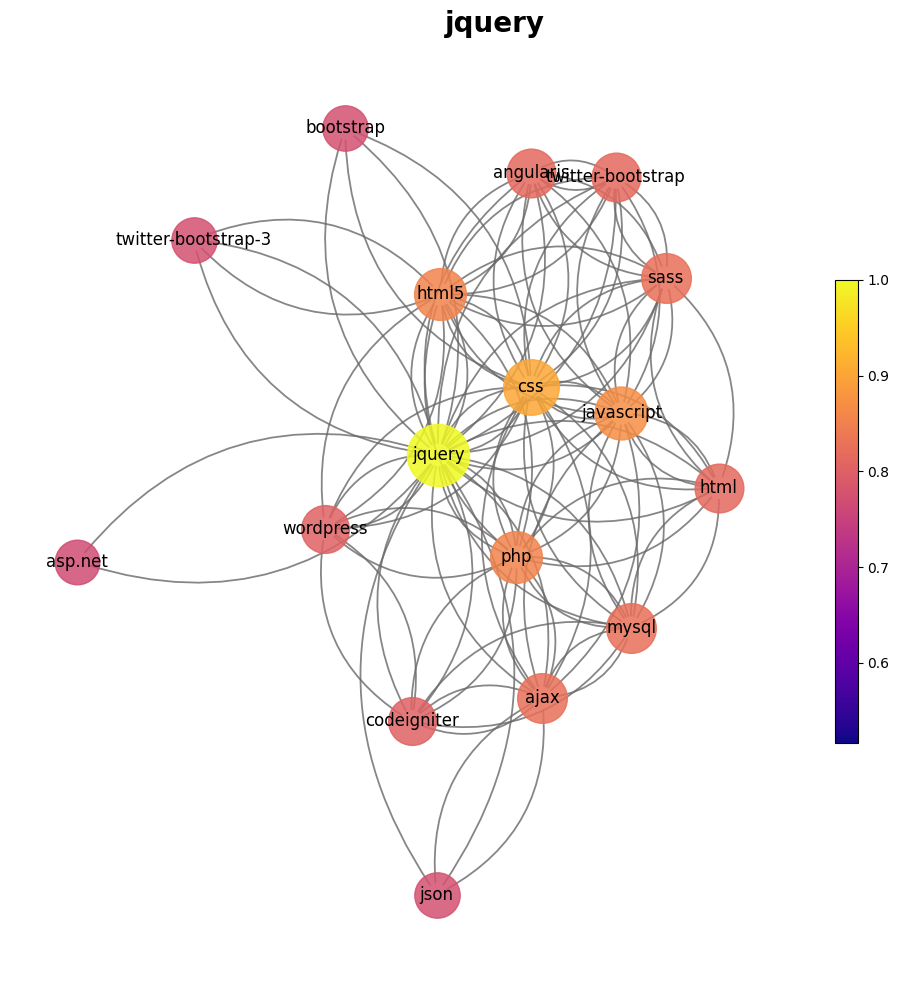

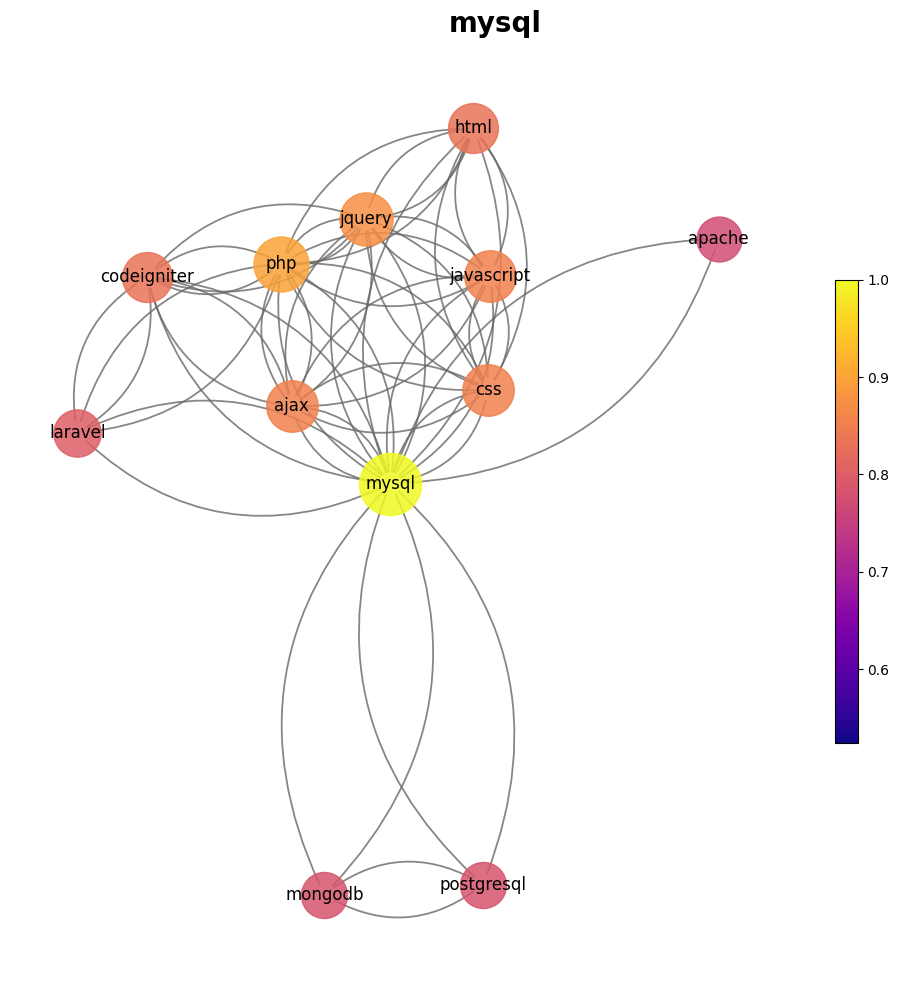

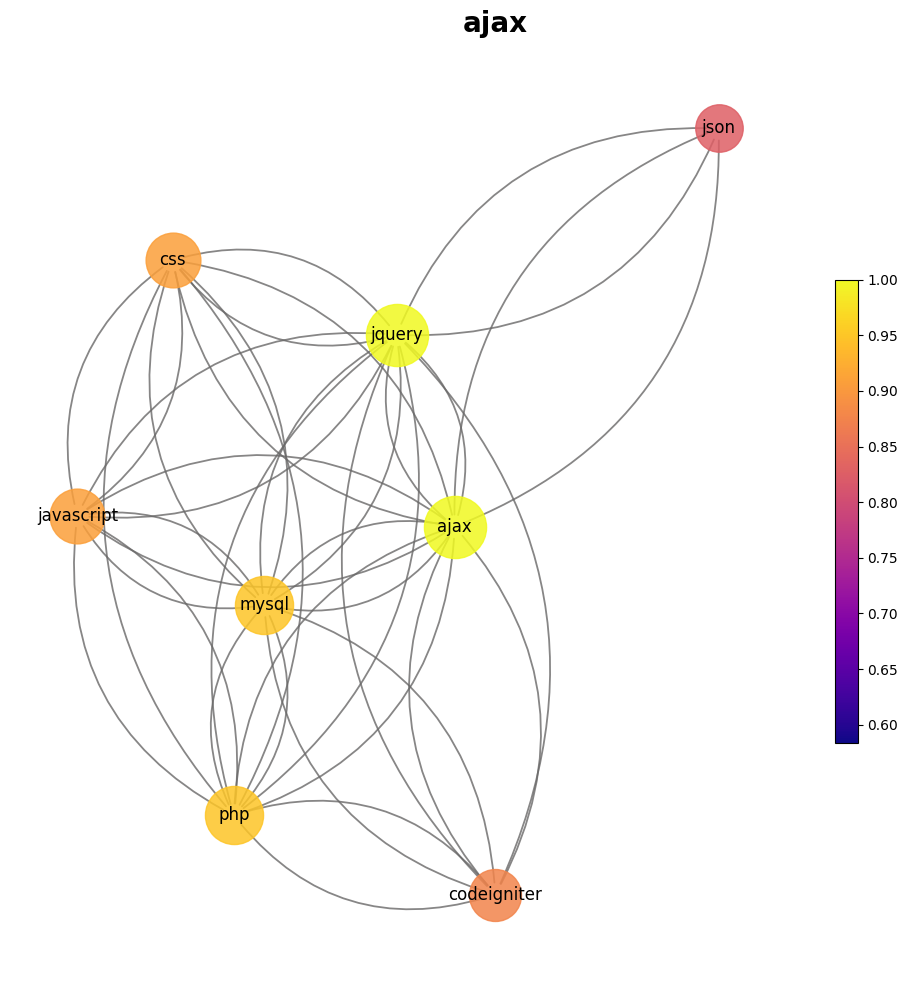

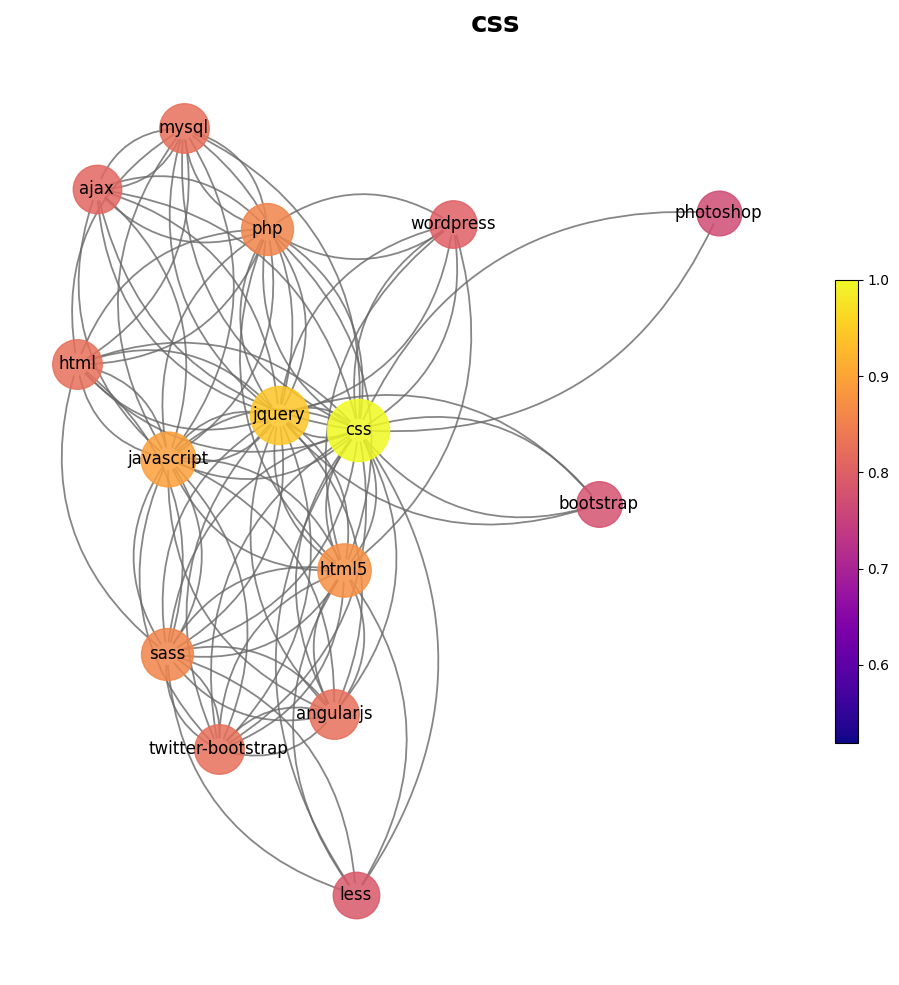

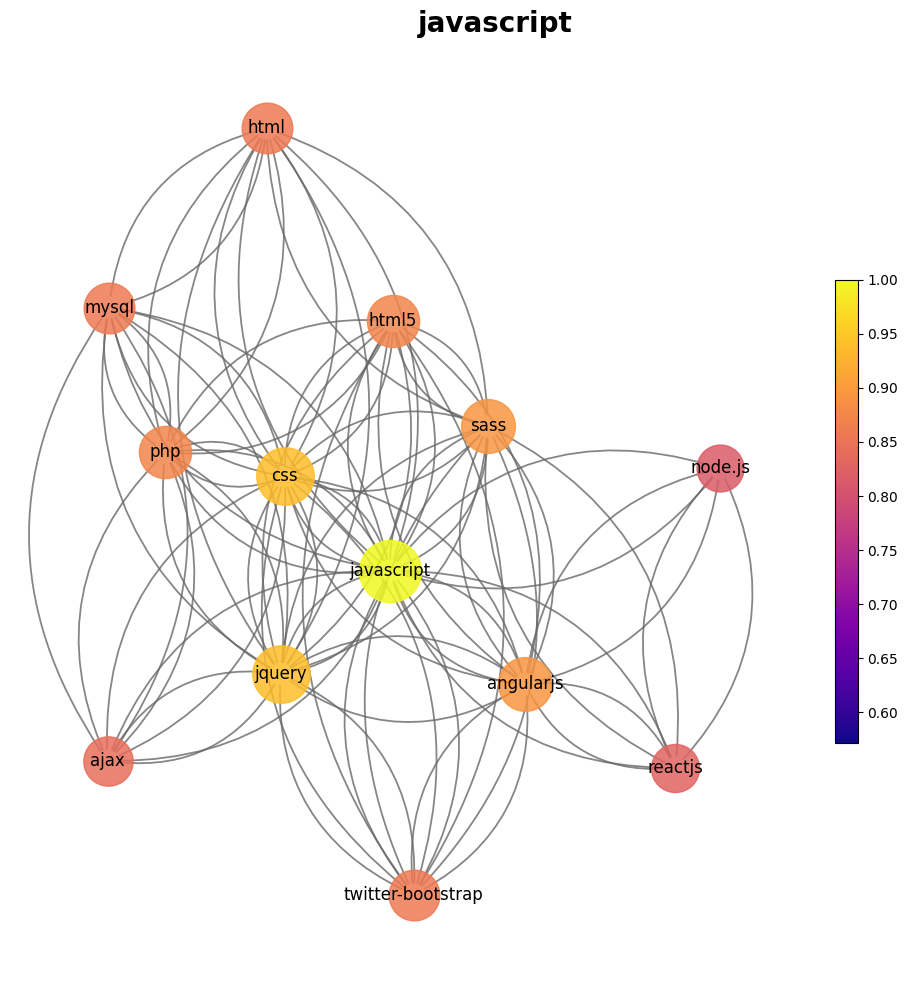

In [152]:
draw_subgraph(G, nodes, "closeness_centrality")

## Betweenness centrality

betweenness_sequence: [('jquery', 0.25553997534572337), ('linux', 0.208401608741618), ('mysql', 0.19769314773273786), ('asp.net', 0.17406690608353656), ('apache', 0.1308718606343199), ('json', 0.12319763505138448), ('angularjs', 0.12286762799187793), ('rest', 0.11370118004957315), ('python', 0.1101830602249792), ('postgresql', 0.08761830339613293), ('java', 0.07601405167311086), ('mongodb', 0.06737252741910406), ('osx', 0.06635551651853468), ('jenkins', 0.05981851611101727), ('django', 0.05779082240190765), ('amazon-web-services', 0.05643737397347083), ('c#', 0.05575657988189837), ('azure', 0.054000196569856024), ('asp.net-web-api', 0.053419633104008026), ('hibernate', 0.0530439040336572), ('spring', 0.0530439040336572), ('git', 0.05177577481257035), ('css', 0.04133537048548419), ('maven', 0.03963350437966181), ('ios', 0.03848717309360066), ('android', 0.03133053873622108), ('docker', 0.03081403967524134), ('angular2', 0.030740568234746156), ('sql', 0.030740568234746156), ('c++', 0.029

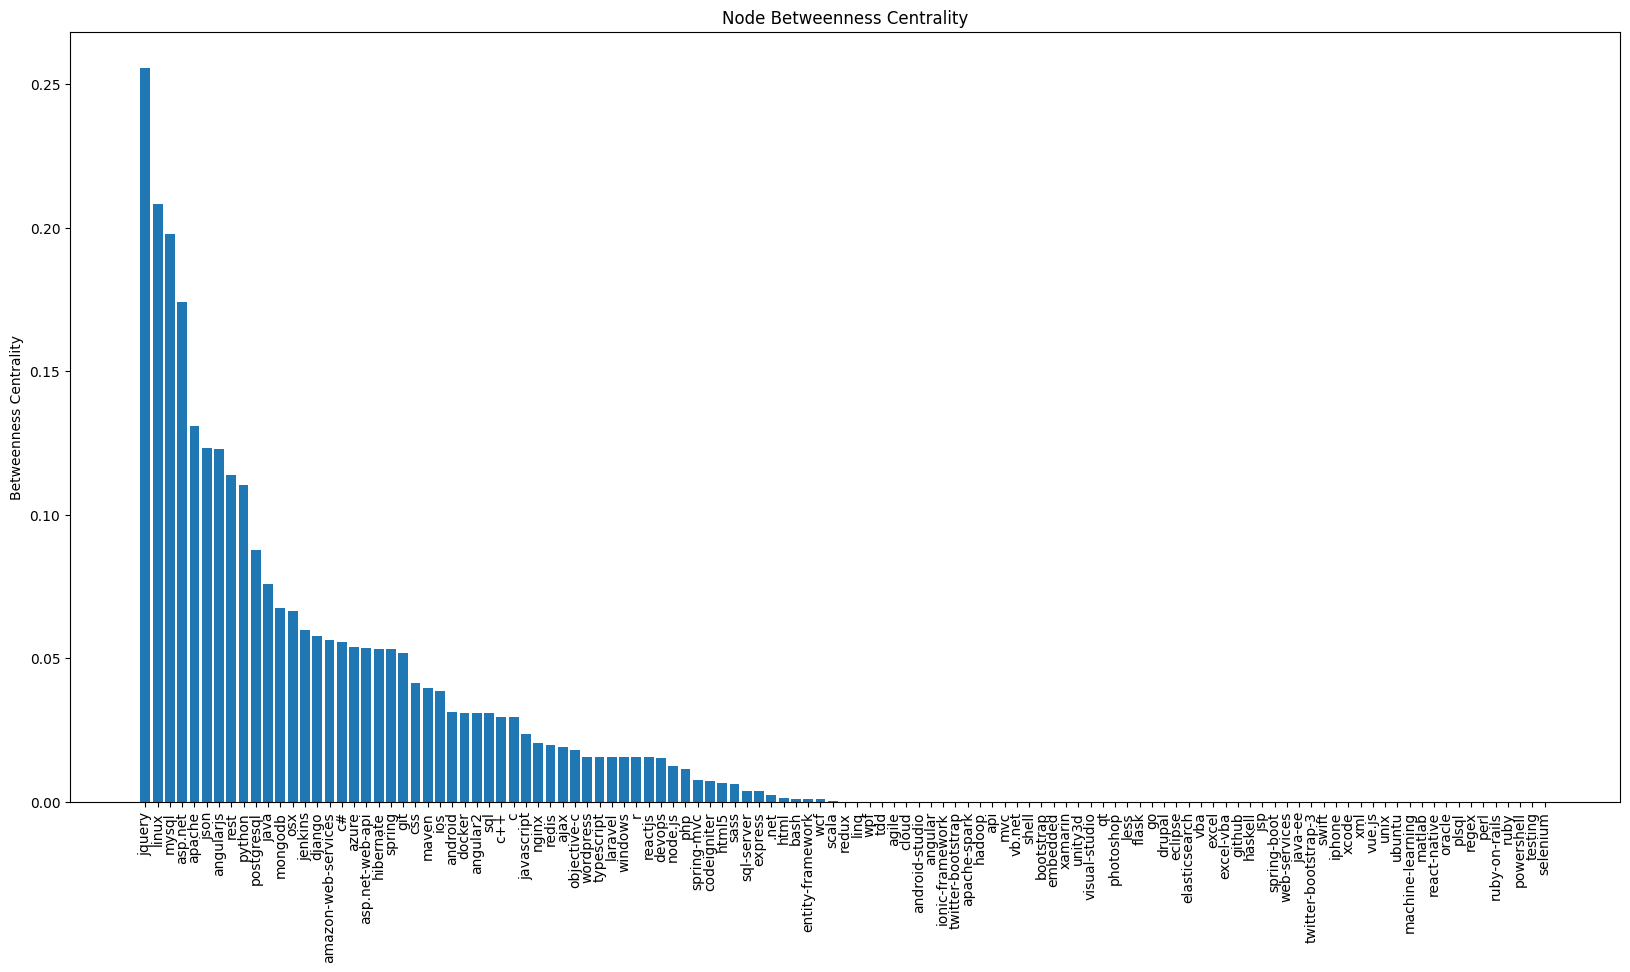

In [153]:
betweenness_centrality = nx.betweenness_centrality(G)

# 將節點按介數中心性排序
betweenness_sequence = sorted(
    [(n, d) for n, d in betweenness_centrality.items()],
    key=lambda x: x[1],
    reverse=True,
)
print("betweenness_sequence:", betweenness_sequence)


# 將數據分成兩個列表
nodes, betweenness_values = zip(*betweenness_sequence)

# 創建一個新的圖形
plt.figure(figsize=(20, 10))

# 創建一個條形圖
plt.bar(range(len(nodes)), betweenness_values, align="center")

# 添加標籤並旋轉90度
plt.xticks(range(len(nodes)), nodes, rotation=90)
plt.ylabel("Betweenness Centrality")
plt.title("Node Betweenness Centrality")

# 顯示圖形
plt.show()

c:\Users\akali\dev\NTUST_Course-Social\.venv\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


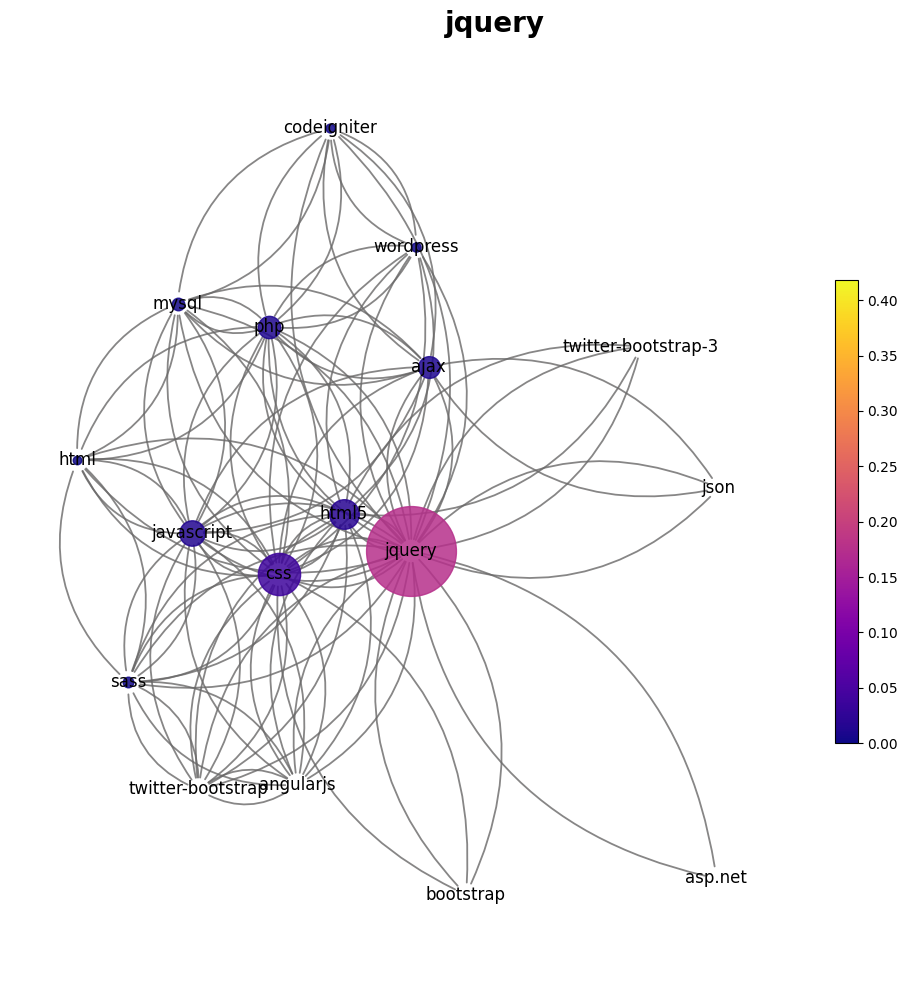

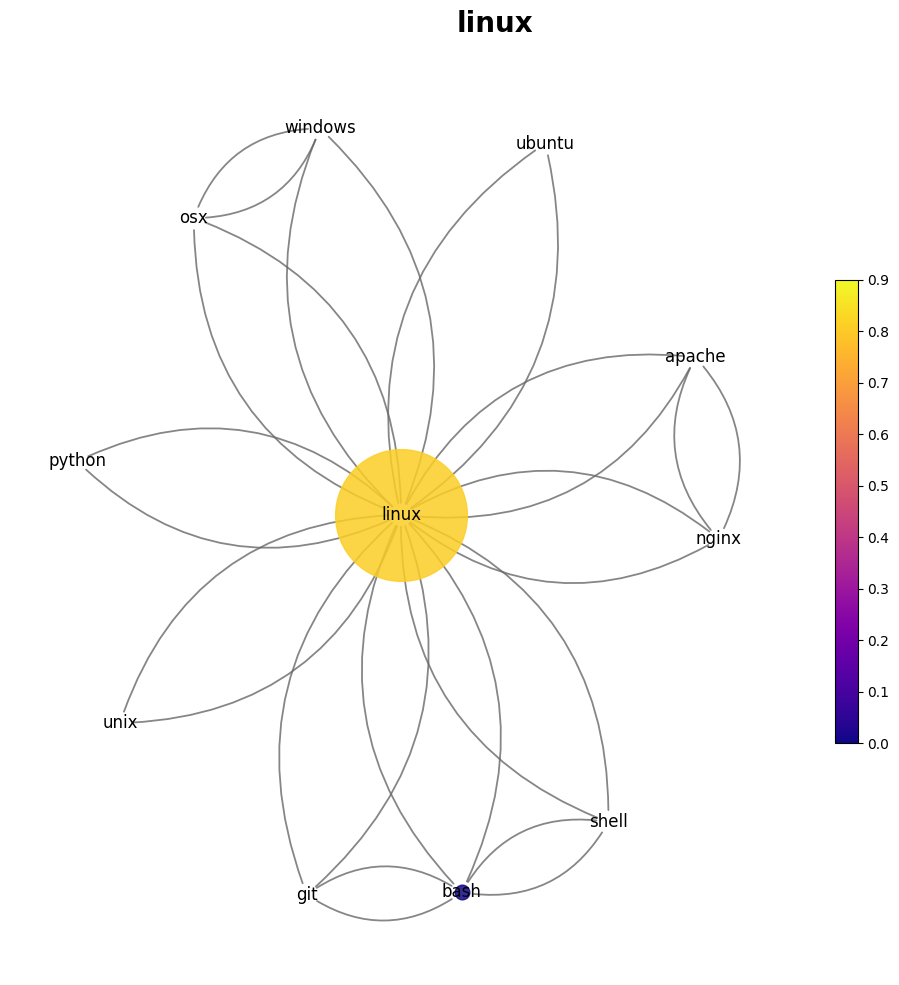

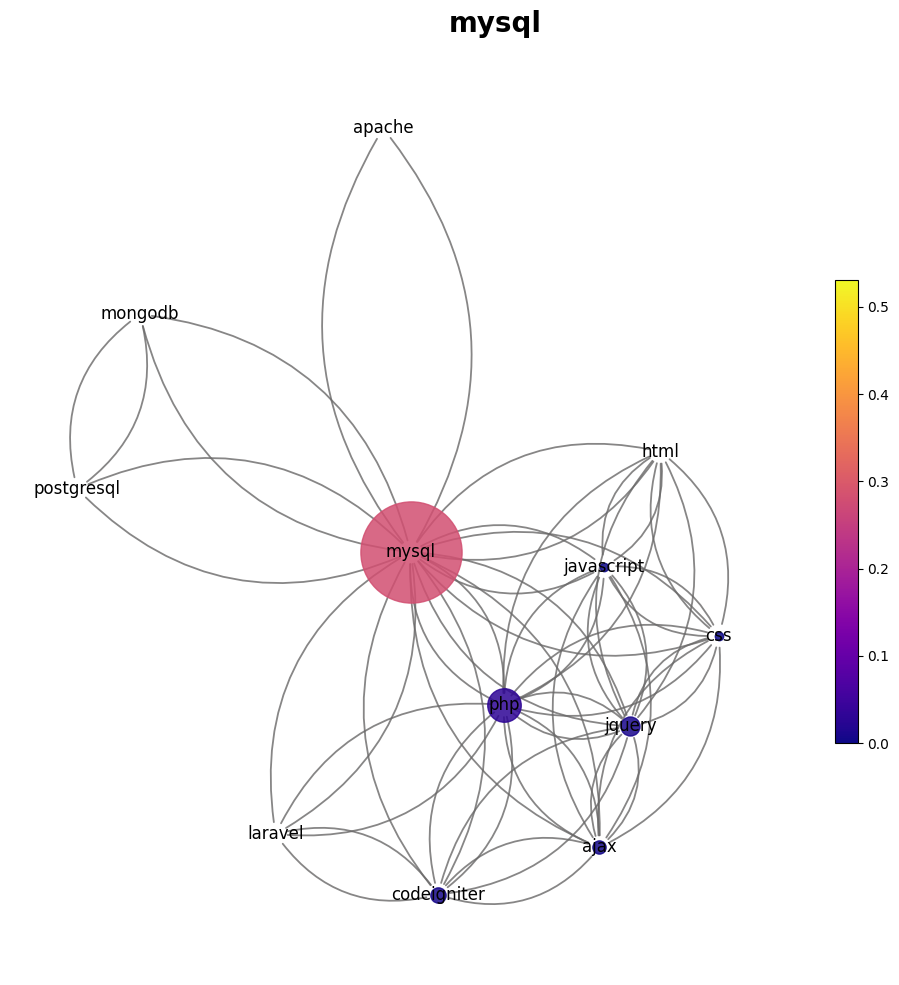

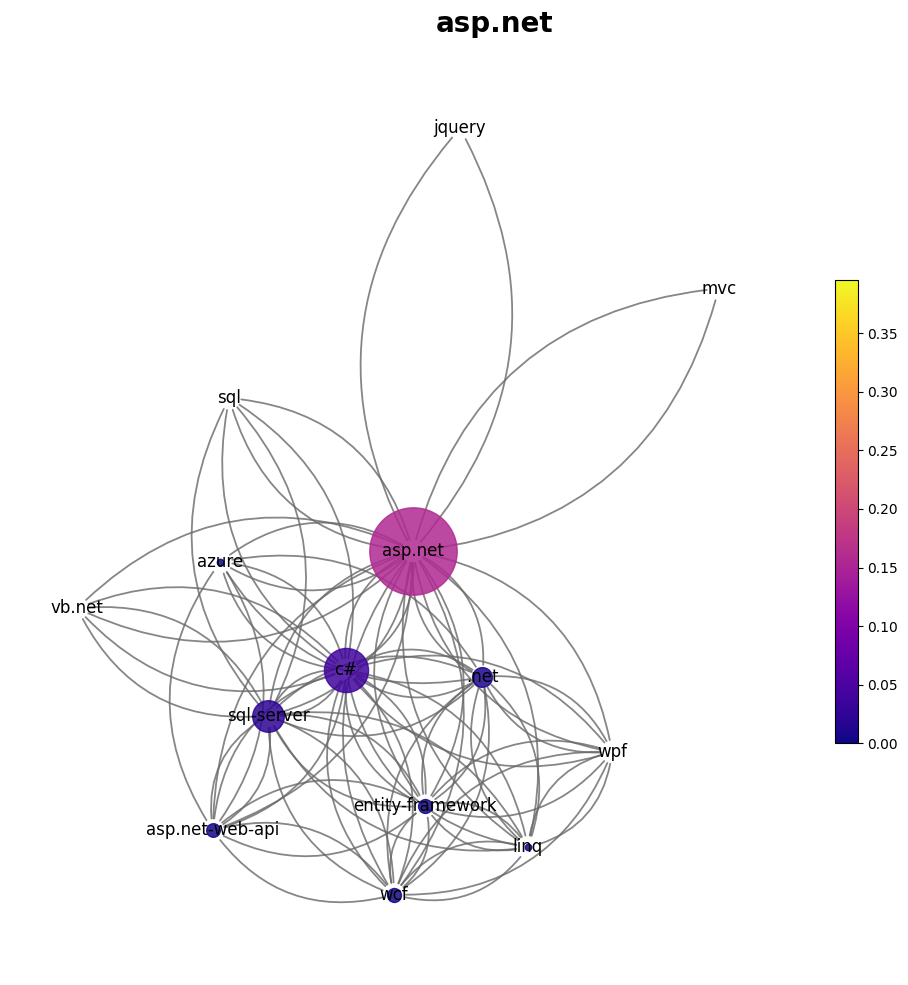

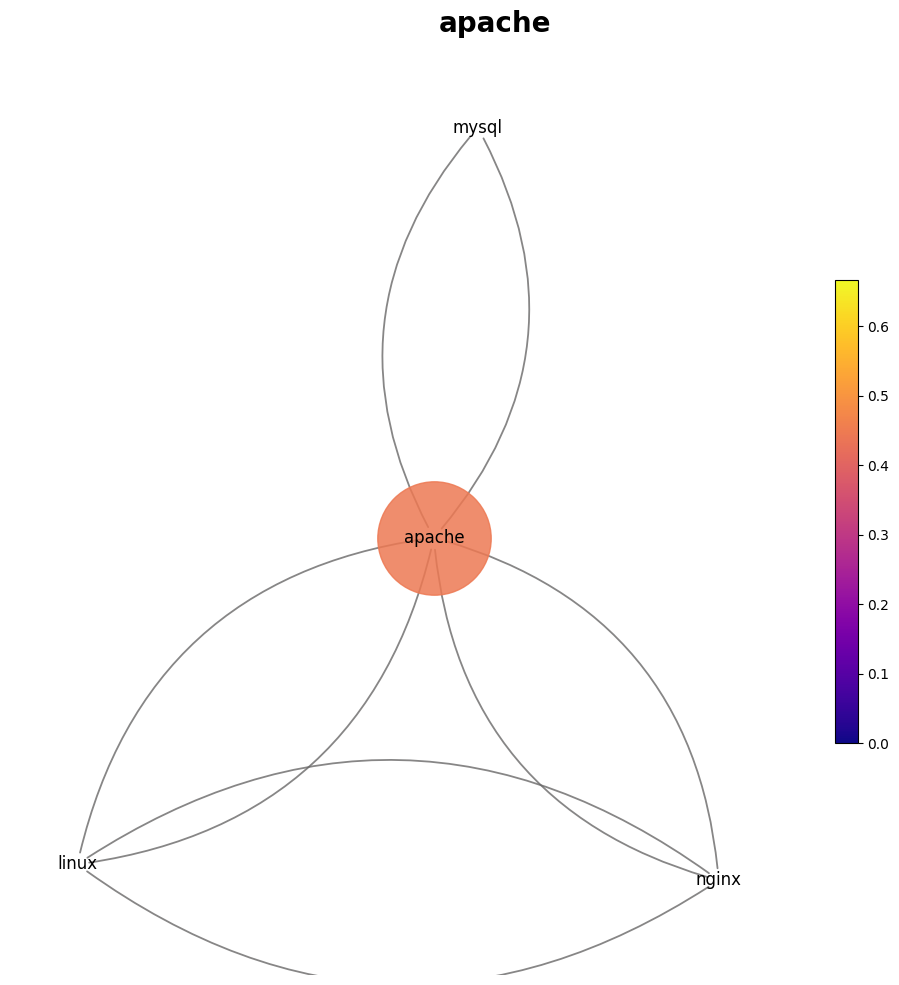

In [154]:
draw_subgraph(G, nodes, "betweenness_centrality", node_size=10000)

## Eigenvector centrality

eigenvector_sequence: [('jquery', 0.3657638453622554), ('css', 0.3387011802411171), ('javascript', 0.3256309863888928), ('html5', 0.2681052746250042), ('php', 0.26530101525817973), ('angularjs', 0.2652026528173442), ('sass', 0.25209577618527057), ('mysql', 0.23934265825386303), ('twitter-bootstrap', 0.20709455337131882), ('html', 0.2038246927757326), ('ajax', 0.1996216619453875), ('wordpress', 0.16028159729147778), ('codeigniter', 0.1489586177058494), ('reactjs', 0.13770631051407164), ('asp.net', 0.11335424787107433), ('node.js', 0.11189410352446869), ('mongodb', 0.10326898029299711), ('less', 0.09797510969685977), ('bootstrap', 0.08035855855730215), ('asp.net-web-api', 0.07857086259618636), ('c#', 0.07728807819558776), ('laravel', 0.07553939964230413), ('express', 0.07516052680941877), ('twitter-bootstrap-3', 0.07230568206070491), ('json', 0.06629110836596809), ('sql-server', 0.06557121653546157), ('entity-framework', 0.06459773471227317), ('wcf', 0.06459773471227317), ('.net', 0.0604

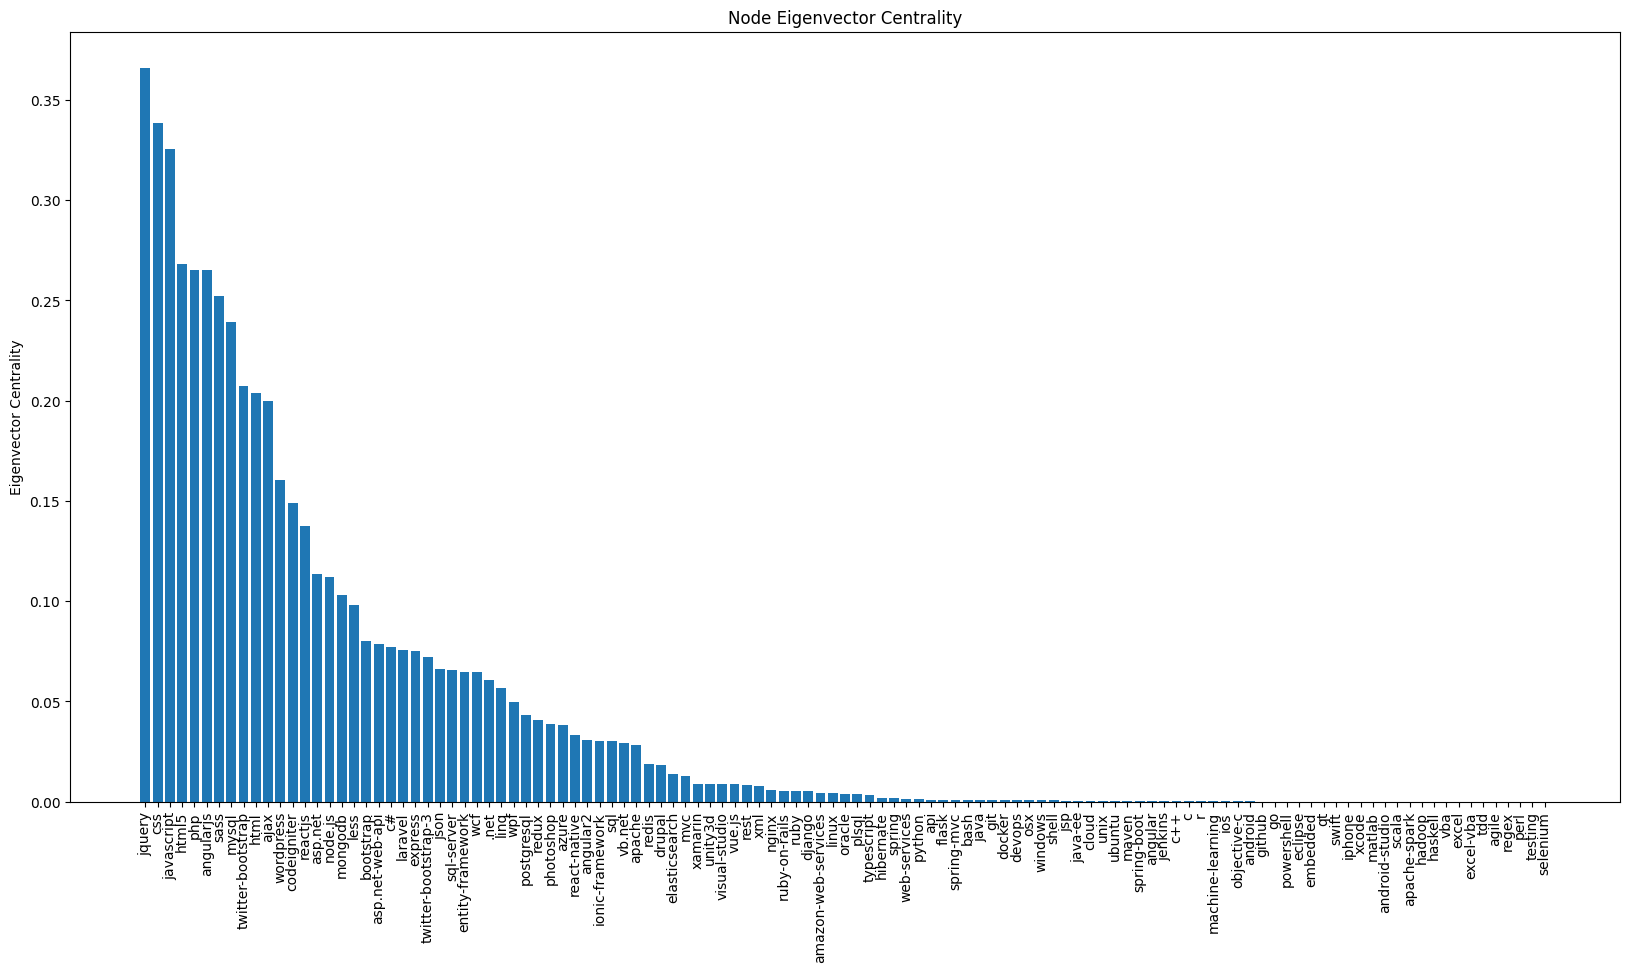

In [155]:
eigenvector_centrality = nx.eigenvector_centrality(G)

# 將節點按特徵向量中心性排序
eigenvector_sequence = sorted(
    [(n, d) for n, d in eigenvector_centrality.items()],
    key=lambda x: x[1],
    
    reverse=True,
)
print("eigenvector_sequence:", eigenvector_sequence)


# 將數據分成兩個列表
nodes, eigenvector_values = zip(*eigenvector_sequence)

# 創建一個新的圖形
plt.figure(figsize=(20, 10))

# 創建一個條形圖
plt.bar(range(len(nodes)), eigenvector_values, align="center")

# 添加標籤並旋轉90度
plt.xticks(range(len(nodes)), nodes, rotation=90)
plt.ylabel("Eigenvector Centrality")
plt.title("Node Eigenvector Centrality")

# 顯示圖形
plt.show()

c:\Users\akali\dev\NTUST_Course-Social\.venv\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


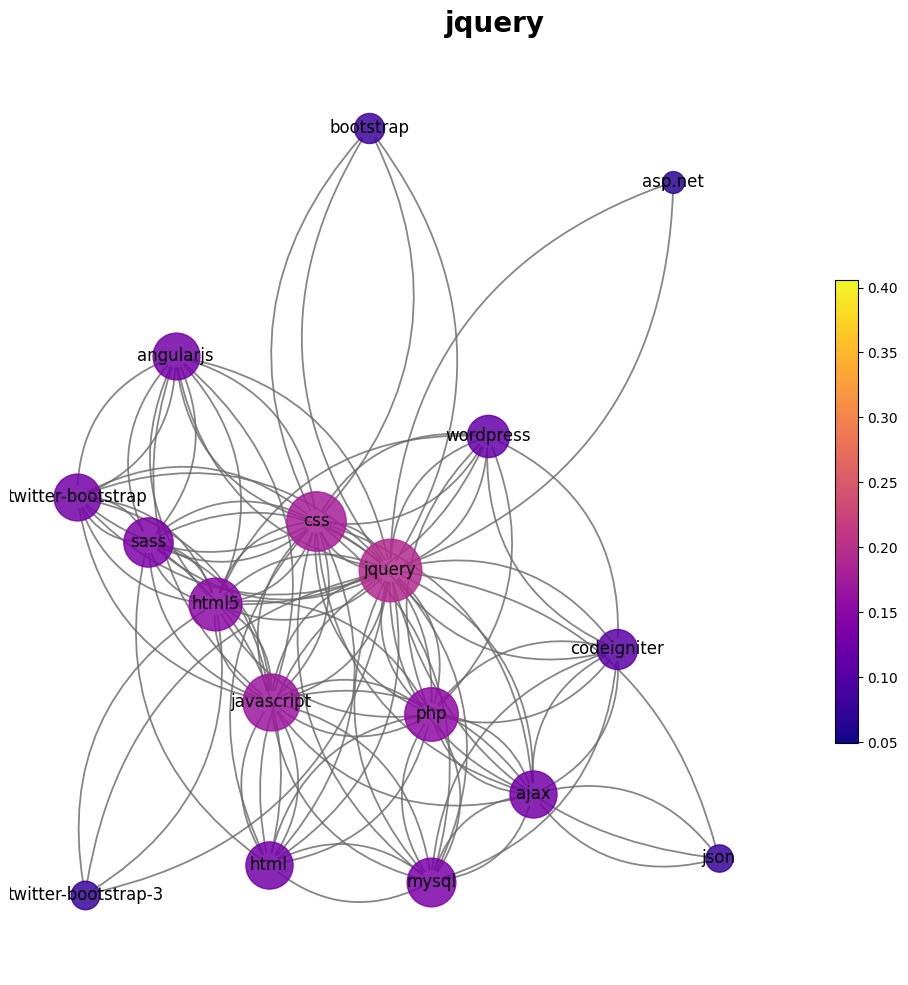

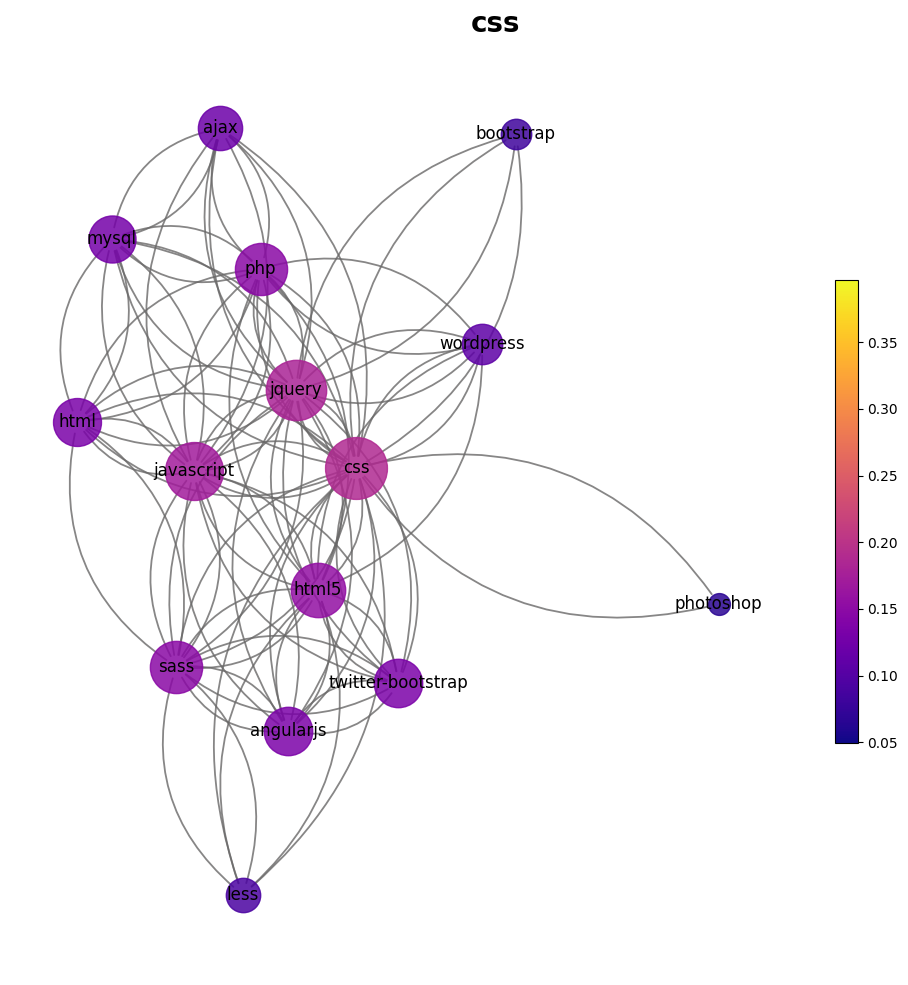

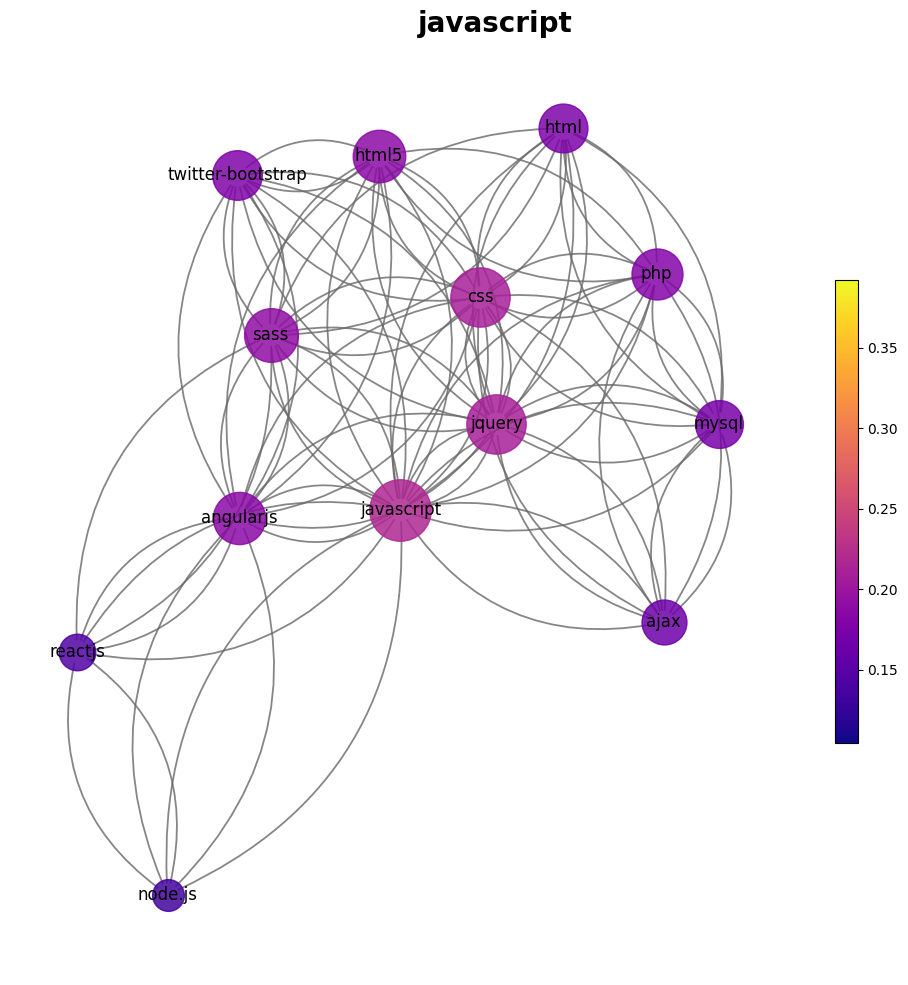

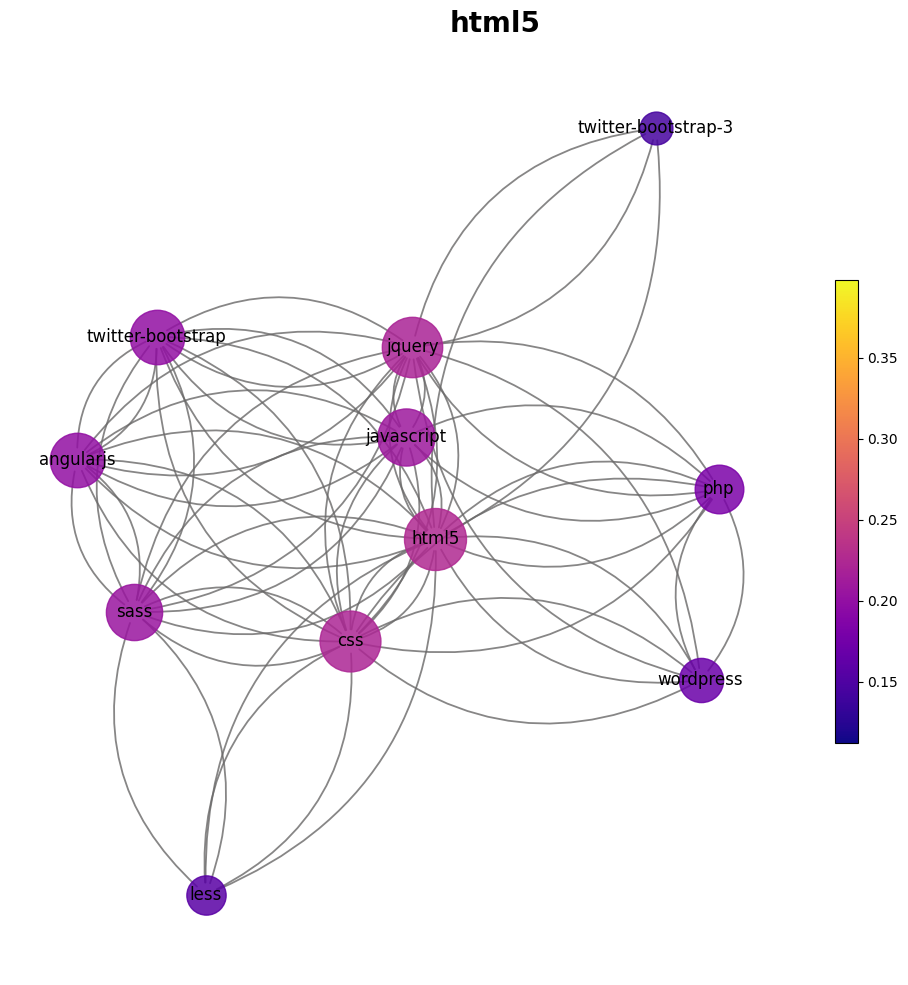

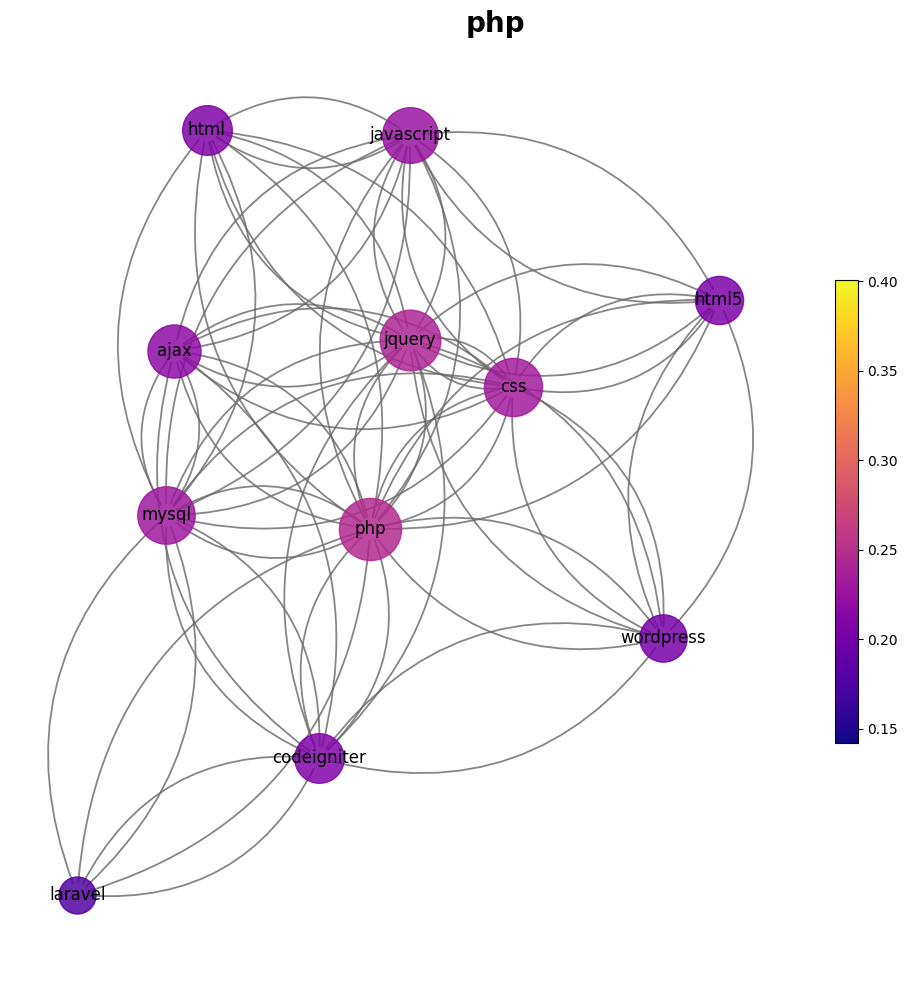

In [156]:
draw_subgraph(G, nodes, "eigenvector_centrality", node_size=5000)